# Books order analyst

Target:

1. What Top 5 books with the best number of books sold? What is the quantity? 
What Top 5 book has the best sales? How much was earned that books?

2. What city has the best quantity order? (Customer's address)
How much quantity order from customers from that city?

3. What time should we display ads to maximize the likelihood of customer's buying product?

4. What the best month for sales in 2020?
How much was earned that month?



Data source: https://www.kaggle.com/datasets/zusmani/gufhtugu-publications-dataset-challenge/code

## Loading and exporing dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [2]:
df_ = pd.read_csv("D:\DATA SOURCE\online_books_order_dataset\GP Orders - 5.csv")
df_.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\MSI Laptop\AppData\Local\Temp\ipykernel_10056\719910923.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_ = pd.read_csv("D:\DATA SOURCE\online_books_order_dataset\GP Orders - 5.csv")


,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0


In [3]:
df_.shape # checking total rows and columns

(19239, 8)

In [4]:
df_.columns

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object')

In [5]:
df_.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          19239 non-null  int64  
 1   Order Status          19239 non-null  object 
 2   Book Name             19237 non-null  object 
 3   Order Date & Time     19239 non-null  object 
 4   City                  19238 non-null  object 
 5   Payment Method        19229 non-null  object 
 6   Total items           19239 non-null  int64  
 7   Total weight (grams)  19239 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


## Data cleaning


In [6]:
df_.isnull().sum()

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

In [7]:
df_.duplicated().sum()

0

In [8]:
df_.dropna(inplace = True)
df_.isnull().sum()

Order Number            0
Order Status            0
Book Name               0
Order Date & Time       0
City                    0
Payment Method          0
Total items             0
Total weight (grams)    0
dtype: int64

In [9]:
df_.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0


In [10]:
df_['Order Status'].value_counts()

Order Status
Completed    17937
Returned      1140
Cancelled      149
Name: count, dtype: int64

In [11]:
#filter data with Order Status = "Completed"


In [12]:
df = df_[df_['Order Status'] == "Completed"]
df

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,10/3/2019 19:34,Karach,Cash on Delivery (COD),2,200.0
...,...,...,...,...,...,...,...,...
19234,71332,Completed,Linux - An Introduction,1/25/2021 12:46,Lahore,Cash on delivery,1,200.0
19235,71394,Completed,R ka Taaruf/ڈیٹا سائنس/Python Programming/Kagg...,1/25/2021 14:06,Lahore,Cash on delivery,4,200.0
19236,71418,Completed,"Blockchain, Cryptocurrency And Bitcoin/Column ...",1/25/2021 16:37,Larkana,Cash on delivery,2,500.0
19237,71419,Completed,مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/...,1/25/2021 18:01,"Mailsi, district Vehari",Cash on delivery,10,400.0


In [13]:
unique_books = pd.unique(df['Book Name']) #creating ndarray of unique book names
type(unique_books)
print(unique_books)
unique_books

['Kaggle for Begginers'
 'Kaggle for Begginers/Bitcoin Blockchain aur Crypto Currency - FREE E-Book'
 'Bit Coin Block Chain aur Crypto Currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی'
 ... 'Blockchain, Cryptocurrency And Bitcoin/Column Nigari Kese Sekhain'
 'مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/Blockchain, Cryptocurrency And Bitcoin/Python Programming/انٹرنیٹ سے پیسہ کمائیں/R ka Taaruf/Introduction to Blockchain with Case Studies/Linux - An Introduction/Kaggle for Begginers'
 'Linux - An Introduction/Python Programming/Kaggle for Begginers/Artificial Intelligence/ایک تھا الگورتھم/R ka Taaruf/مشین لرننگ']


array(['Kaggle for Begginers',
       'Kaggle for Begginers/Bitcoin Blockchain aur Crypto Currency - FREE E-Book',
       'Bit Coin Block Chain aur Crypto Currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی',
       ...,
       'Blockchain, Cryptocurrency And Bitcoin/Column Nigari Kese Sekhain',
       'مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/Blockchain, Cryptocurrency And Bitcoin/Python Programming/انٹرنیٹ سے پیسہ کمائیں/R ka Taaruf/Introduction to Blockchain with Case Studies/Linux - An Introduction/Kaggle for Begginers',
       'Linux - An Introduction/Python Programming/Kaggle for Begginers/Artificial Intelligence/ایک تھا الگورتھم/R ka Taaruf/مشین لرننگ'],
      dtype=object)

### 1. What Top 5 books with the best quantity sold? How much is the quantity? 
### What Top 5 book has the best sales? How much was earned that books?

In [14]:
all_books = df['Book Name'].str.split('/', expand = False) #separate multiple book names in different cells 
all_books


1                                   [Kaggle for Begginers]
2        [Kaggle for Begginers, Bitcoin Blockchain aur ...
4        [Bit Coin Block Chain aur Crypto Currency بٹ ک...
5        [Bit Coin Block Chain aur Crypto Currency بٹ ک...
7        [Global Science - Issue 219, R ka Taaruf  آر ک...
                               ...                        
19234                            [Linux - An Introduction]
19235    [R ka Taaruf, ڈیٹا سائنس, Python Programming, ...
19236    [Blockchain, Cryptocurrency And Bitcoin, Colum...
19237    [مشین لرننگ, ڈیٹا سائنس, Artificial Intelligen...
19238    [Linux - An Introduction, Python Programming, ...
Name: Book Name, Length: 17937, dtype: object

In [15]:
#Flattening list of lists into a single 1D list
list_book = []

for item in all_books:
    if type(item) is list:
        for ele in item:
            list_book.append(ele)
    else:
        list_book.append(item)

list_book

['Kaggle for Begginers',
 'Kaggle for Begginers',
 'Bitcoin Blockchain aur Crypto Currency - FREE E-Book',
 'Bit Coin Block Chain aur Crypto Currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی',
 'Bit Coin Block Chain aur Crypto Currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی',
 'Kaggle for Begginers',
 '(C++) ++سی',
 'سی',
 'Introduction to Blockchain with Case Studies',
 'Global Science - Issue 219',
 'R ka Taaruf  آر کا تعارف',
 'Har Shaye Ka Nazria - ہر شے کا نظریہ',
 'Molo Masali - مولو مصلی',
 '(C++) ++سی',
 'سی',
 'A Brief History of Money',
 'Band kamron ki Muhabbat',
 'Bit Coin Block Chain aur Crypto Currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی',
 'Introduction to Blockchain with Case Studies',
 'Kaggle for Begginers',
 'Safar e Hajj سفر حج',
 'Shaoor شعور۔ علم سے آگہی کا سفر',
 'Data Structures',
 'Data Structures',
 'Bit Coin Block Chain aur Crypto Currency بٹ کوائن، بلاک چین اور کرپٹو کرنسی',
 'Data Structures',
 'Molo Masali - مولو مصلی',
 'Kaggle for Begginers',
 'R ka Taaruf  آر کا ت

In [16]:
#converting the result(list_book) from a list into Series type to perform the functions below:
all_books = pd.Series(list_book)

In [17]:
# counting books and finfing top 5 the most selling book
print('Most selling book with its selling score is:\n" ')
all_books.value_counts().nlargest(5) 


Most selling book with its selling score is:
" 


انٹرنیٹ سے پیسہ کمائیں                    3020
Python Programming                        2222
Artificial Intelligence                   1994
Blockchain, Cryptocurrency And Bitcoin    1718
Product Management                        1492
Name: count, dtype: int64

In [18]:
top5_books = all_books.value_counts().head(5)
top5_books = pd.Series(top5_books)

c:\Users\MSI Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MSI Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MSI Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


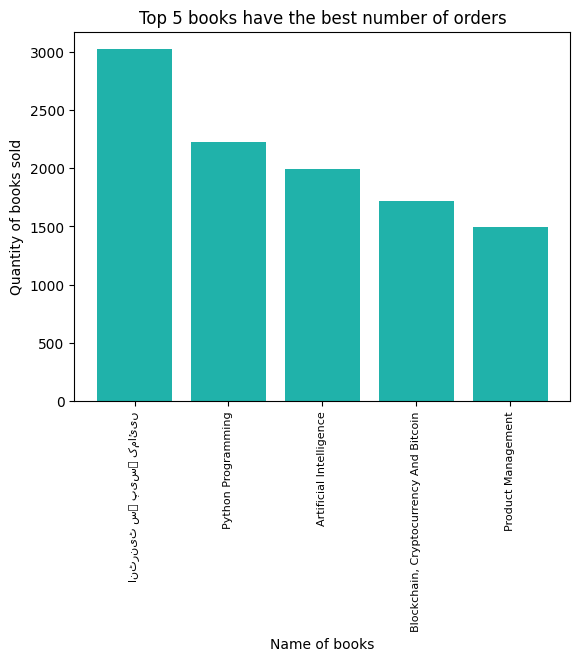

In [19]:
plt.bar(top5_books.index, top5_books.values, color = 'lightseagreen')
plt.xlabel('Name of books')
plt.ylabel('Quantity of books sold')
plt.xticks(rotation = 90, size = 8)
plt.title('Top 5 books have the best number of orders')
plt.show()

### Top 5 books has the best sales

In [20]:
df.head()
# Can see the dataset don't have the price colum, so i can't analysis top 5 books has the best sales

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,10/3/2019 19:34,Karach,Cash on Delivery (COD),2,200.0


### 2. What City has the best quantity sold?

In [21]:
df.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,10/3/2019 19:34,Karach,Cash on Delivery (COD),2,200.0


In [22]:
df.columns

Index(['Order Number', 'Order Status', 'Book Name', 'Order Date & Time',
       'City', 'Payment Method', 'Total items', 'Total weight (grams)'],
      dtype='object')

In [23]:
all_cities = df['City']
all_cities

1                     Rawalpindi
2                      Hyderabad
4                       Karachi 
5                            FSD
7                         Karach
                  ...           
19234                     Lahore
19235                     Lahore
19236                    Larkana
19237    Mailsi, district Vehari
19238                     Lahore
Name: City, Length: 17937, dtype: object

In [24]:
top5_cities = all_cities.value_counts().nlargest(5)
top5_cities

City
Karachi       2241
Lahore        1910
Islamabad      815
Rawalpindi     616
Faisalabad     454
Name: count, dtype: int64

#### Can see Karachi has the best quantity orders with 2241 order

Text(0.5, 1.0, 'Top 5 books has the best quantity orders')

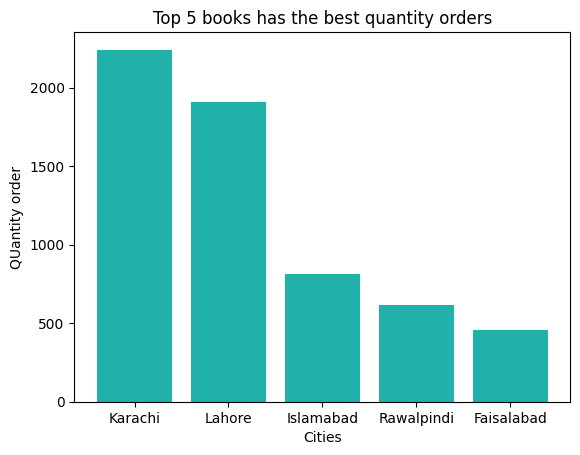

In [25]:
plt.bar(top5_cities.index, top5_cities.values, color = 'lightseagreen')
plt.xlabel('Cities')
plt.ylabel('QUantity order')
plt.title('Top 5 books has the best quantity orders')

### 3. What time should we display ads to maximize the likelihood of customer's buying product?

In [26]:
df.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,10/3/2019 19:34,Karach,Cash on Delivery (COD),2,200.0


In [27]:
#check datatype of column: Order Date & Time
print(df['Order Date & Time'].dtypes)

object


In [28]:
#coverting datatype of column 'Order Date & Time' to datetime
df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'])

C:\Users\MSI Laptop\AppData\Local\Temp\ipykernel_10056\297137235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date & Time'] = pd.to_datetime(df['Order Date & Time'])


In [29]:
#get hours from datetime and create a new column
df['Hours'] = df['Order Date & Time'].dt.hour
df

C:\Users\MSI Laptop\AppData\Local\Temp\ipykernel_10056\2334396062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hours'] = df['Order Date & Time'].dt.hour


,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Hours
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,15
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,16
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0,16
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,18
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,2019-10-03 19:34:00,Karach,Cash on Delivery (COD),2,200.0,19
...,...,...,...,...,...,...,...,...,...
19234,71332,Completed,Linux - An Introduction,2021-01-25 12:46:00,Lahore,Cash on delivery,1,200.0,12
19235,71394,Completed,R ka Taaruf/ڈیٹا سائنس/Python Programming/Kagg...,2021-01-25 14:06:00,Lahore,Cash on delivery,4,200.0,14
19236,71418,Completed,"Blockchain, Cryptocurrency And Bitcoin/Column ...",2021-01-25 16:37:00,Larkana,Cash on delivery,2,500.0,16
19237,71419,Completed,مشین لرننگ/ڈیٹا سائنس/Artificial Intelligence/...,2021-01-25 18:01:00,"Mailsi, district Vehari",Cash on delivery,10,400.0,18


In [30]:
#count numbers of order by hours
df['Hours']
df['Hours'].value_counts()


Hours
21    1207
22    1183
20    1145
19    1039
23    1016
15    1001
18     966
16     933
17     911
12     904
11     880
14     846
10     845
13     822
0      700
9      696
8      566
7      457
1      455
6      369
2      305
5      255
3      233
4      203
Name: count, dtype: int64

In [31]:
order_by_hour = df.groupby('Hours').count()['Total items']
order_by_hour.max()

1207

In [32]:
order_by_hour

Hours
0      700
1      455
2      305
3      233
4      203
5      255
6      369
7      457
8      566
9      696
10     845
11     880
12     904
13     822
14     846
15    1001
16     933
17     911
18     966
19    1039
20    1145
21    1207
22    1183
23    1016
Name: Total items, dtype: int64

#### Can see at 21:00, we have the the best number of orders with 1207 orders 
#### So, we should  display ads about 30 to 1 hour before 21:00 pm

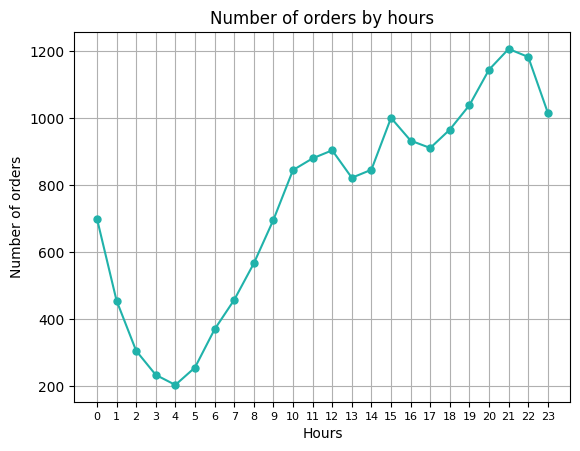

In [33]:
plt.plot(order_by_hour.index, order_by_hour.values, color = 'lightseagreen', marker = '.', markersize = 10)
plt.title('Number of orders by hours')
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.xticks(order_by_hour.index, size = 8)
plt.grid()
plt.show()

### 4. What the best month for sales in 2021?
### How much was earned that month?

In [34]:
df.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Hours
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,15
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,16
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0,16
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,18
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,2019-10-03 19:34:00,Karach,Cash on Delivery (COD),2,200.0,19


In [35]:
#get year from "Order Date & Time" column and create a new column
df['Year'] = df['Order Date & Time'].dt.year
df.head()


C:\Users\MSI Laptop\AppData\Local\Temp\ipykernel_10056\3883609792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Order Date & Time'].dt.year


,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Hours,Year
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,15,2019
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,16,2019
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0,16,2019
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,18,2019
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,2019-10-03 19:34:00,Karach,Cash on Delivery (COD),2,200.0,19,2019


In [36]:
#filter orders in 2020
df_2020 = df[df['Year'] == 2020]
df_2020.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Hours,Year
452,7928,Completed,ڈیٹا سائنس ۔ ایک تعارف,2020-01-01 03:40:00,Hyderabad,Cash on delivery,1,600.0,3,2020
454,7945,Completed,ڈیٹا سائنس ۔ ایک تعارف,2020-01-01 09:52:00,Lahore,Cash on delivery,1,600.0,9,2020
455,7947,Completed,ڈیٹا سائنس ۔ ایک تعارف,2020-01-01 10:15:00,Lahore,Cash on delivery,1,600.0,10,2020
457,7957,Completed,ڈیٹا سائنس ۔ ایک تعارف,2020-01-01 13:02:00,Muzaffargarh,Cash on delivery,1,600.0,13,2020
458,7994,Completed,Kaggle for Begginers/ڈیٹا سائنس ۔ ایک تعارف/R ...,2020-01-01 14:28:00,Karachi,Cash on delivery,4,600.0,14,2020


In [37]:
#separates the months in "Order Date & Time" and forms a new column
df_2020['Order Date & Time'].dt.month

452       1
454       1
455       1
457       1
458       1
         ..
16554    12
16555    12
16556    12
16557    12
16558    12
Name: Order Date & Time, Length: 15047, dtype: int32

In [38]:
df_2020['Months'] = df_2020['Order Date & Time'].dt.month
df_2020.head()

C:\Users\MSI Laptop\AppData\Local\Temp\ipykernel_10056\808707054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Months'] = df_2020['Order Date & Time'].dt.month


,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Hours,Year,Months
452,7928,Completed,ڈیٹا سائنس ۔ ایک تعارف,2020-01-01 03:40:00,Hyderabad,Cash on delivery,1,600.0,3,2020,1
454,7945,Completed,ڈیٹا سائنس ۔ ایک تعارف,2020-01-01 09:52:00,Lahore,Cash on delivery,1,600.0,9,2020,1
455,7947,Completed,ڈیٹا سائنس ۔ ایک تعارف,2020-01-01 10:15:00,Lahore,Cash on delivery,1,600.0,10,2020,1
457,7957,Completed,ڈیٹا سائنس ۔ ایک تعارف,2020-01-01 13:02:00,Muzaffargarh,Cash on delivery,1,600.0,13,2020,1
458,7994,Completed,Kaggle for Begginers/ڈیٹا سائنس ۔ ایک تعارف/R ...,2020-01-01 14:28:00,Karachi,Cash on delivery,4,600.0,14,2020,1


In [39]:
orders_by_months = df_2020.groupby('Months').count()['Total items']
orders_by_months

Months
1      725
2       59
3       82
4      152
5     1488
6     1114
7     1240
8     2292
9     1430
10    1887
11    2428
12    2150
Name: Total items, dtype: int64

In [40]:
max = orders_by_months.max()
max

2428

#### Can see in 11/2020, we have the best number of orders with 2482 orders

Text(0.5, 1.0, 'Number of orders by month in 2020')

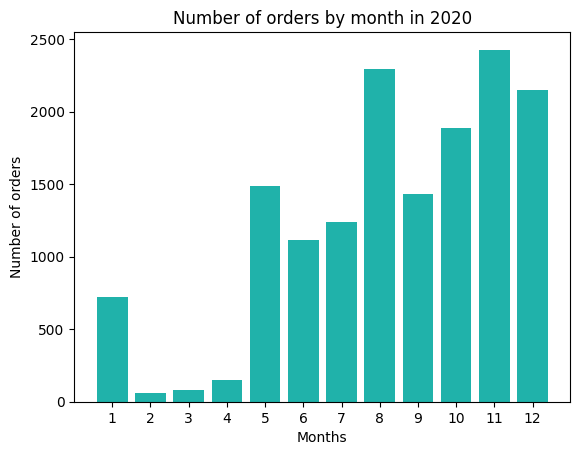

In [41]:
plt.bar(orders_by_months.index, orders_by_months.values, color = 'lightseagreen')
plt.xticks(orders_by_months.index)
plt.xlabel('Months')
plt.ylabel('Number of orders')
plt.title('Number of orders by month in 2020')

In [42]:
df.head()

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams),Hours,Year
1,308,Completed,Kaggle for Begginers,2019-10-03 15:54:00,Rawalpindi,Cash on Delivery (COD),1,200.0,15,2019
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,2019-10-03 16:09:00,Hyderabad,Cash on Delivery (COD),2,200.0,16,2019
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 16:44:00,Karachi,Cash on Delivery (COD),1,200.0,16,2019
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,2019-10-03 18:17:00,FSD,Cash on Delivery (COD),5,200.0,18,2019
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,2019-10-03 19:34:00,Karach,Cash on Delivery (COD),2,200.0,19,2019
